# Análisis Exploratorio de Datos (EDA)

Este proyecto tiene como objetivo realizar un análisis exploratorio de un conjunto de datos de campañas de marketing bancarias. El dataset contiene aproximadamente **43.000 registros y 24 variables**, con información sobre características de los clientes (edad, profesión, estado civil, nivel educativo, etc.), así como detalles de las campañas de contacto y el resultado final de la oferta (`y`).

El trabajo se estructura en las siguientes fases:

1. **Carga y exploración inicial de los datos**  
   Revisión del tamaño del dataset y las primeras filas para comprobar la correcta lectura del archivo.

2. **Limpieza y transformación**  
   Tratamiento de valores nulos, sustitución por la categoría *“desconocido”*, conversión de la edad a formato numérico y eliminación de valores atípicos en la variable `job`.

3. **Análisis descriptivo**  
   Resumen estadístico de las variables numéricas y revisión de las frecuencias de las variables categóricas.

4. **Visualización**  
   Representación gráfica de las principales variables para identificar patrones y distribuciones de manera más clara.

5. **Conclusiones**  
   Resumen de los hallazgos más relevantes que servirán de base para futuros análisis o modelos predictivos.

1. **Carga y exploración inicial de los datos**  
   Revisión del tamaño del dataset y las primeras filas para comprobar la correcta lectura del archivo.

In [1]:
import pandas as pd
pd.__version__

'2.3.2'

In [12]:
import pandas as pd

# Cargar con separador correcto (;)
df = pd.read_csv("bank-additional.csv", sep=";")

print("Filas, columnas:", df.shape)
df.head()

Filas, columnas: (43000, 1)


,",age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_"
0,"0,,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,tele..."
1,"1,57.0,services,MARRIED,high.school,,0.0,0.0,t..."
2,"2,37.0,services,MARRIED,high.school,0.0,1.0,0...."
3,"3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,tel..."
4,"4,56.0,services,MARRIED,high.school,0.0,0.0,1...."


In [15]:
import pandas as pd

# Leer CSV con coma como separador y coma como decimal
df = pd.read_csv("bank-additional.csv", sep=",", decimal=",")

print("Filas, columnas:", df.shape)
df.head()

Filas, columnas: (43000, 24)


,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,1.1,93.994,-36.4,NaN,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,93.994,-36.4,NaN,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,1.1,93.994,-36.4,NaN,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [16]:
df.columns


Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude',
       'longitude', 'id_'],
      dtype='object')

2. **Limpieza y transformación**  
   Tratamiento de valores nulos, sustitución por la categoría *“desconocido”*, conversión de la edad a formato numérico y eliminación de valores atípicos en la variable `job`.

In [17]:
#Ver si hay valores duplicados 
print("Duplicados", df.duplicated().sum())

Duplicados 0


In [18]:
#Ver si hay valores nulos 
df.isnull().sum()

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [19]:
#Ver que tipo de datos hay 
df.dtypes

Unnamed: 0          int64
age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate       object
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
date               object
latitude           object
longitude          object
id_                object
dtype: object

In [20]:
import numpy as np

# 1) Eliminar columna "Unnamed: 0" si existe
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# 2) Columnas numéricas → rellenar con mediana
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))

# 3) Columnas categóricas → rellenar con "desconocido"
cat_cols = df.select_dtypes(include="object").columns
for c in cat_cols:
    df[c] = df[c].fillna("desconocido")

# 4) Comprobar de nuevo
print("Nulos restantes por columna:")
print(df.isna().sum().sort_values(ascending=False).head(10))

Nulos restantes por columna:
age               0
poutcome          0
longitude         0
latitude          0
date              0
y                 0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
dtype: int64


In [21]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
date              0
latitude          0
longitude         0
id_               0
dtype: int64

In [22]:
print("Filas, columnas:", df.shape)
df.head(10)   # ver primeras 10 filas

Filas, columnas: (43000, 23)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,desconocido,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,desconocido,0.0,0.0,telephone,149,1,...,1.1,93.994,-36.4,4.857,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1.1,93.994,-36.4,4.857,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,1.1,93.994,-36.4,4.857,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
5,45.0,services,MARRIED,basic.9y,desconocido,0.0,0.0,telephone,198,1,...,1.1,93.994,-36.4,4.857,5191.0,no,26-septiembre-2015,24.689,-101.643,d63ede72-0b6d-45b1-8872-385ac6897f65
6,59.0,admin.,MARRIED,professional.course,0.0,0.0,0.0,telephone,139,1,...,1.1,93.994,-36.4,4.857,5191.0,no,25-enero-2019,31.456,-94.561,5e3483e5-236d-437d-8351-541f9d09b9dd
7,desconocido,blue-collar,MARRIED,desconocido,desconocido,0.0,0.0,telephone,217,1,...,1.1,93.994,-36.4,4.857,5191.0,no,25-septiembre-2017,46.871,-122.235,87fdc08b-30ae-4dab-803f-561ecdf27ff0
8,24.0,technician,SINGLE,professional.course,0.0,1.0,0.0,telephone,380,1,...,1.1,93.994,-36.4,4.857,5191.0,no,18-enero-2018,44.632,-85.811,87b79988-2be5-419d-88f4-56655852c565
9,25.0,services,SINGLE,high.school,0.0,1.0,0.0,telephone,50,1,...,1.1,93.994,-36.4,4.857,5191.0,no,2-noviembre-2016,30.297,-117.382,ea6b7d04-9271-4c0a-a01f-07795d164aba


In [23]:
cols_binarias = ["default", "housing", "loan"]

for c in cols_binarias:
    df[c] = df[c].map({0.0: "no", 1.0: "si"}).fillna("desconocido")

In [24]:
print("Filas, columnas:", df.shape)
df.head(10)   # ver primeras 10 filas

Filas, columnas: (43000, 23)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,desconocido,housemaid,MARRIED,basic.4y,desconocido,desconocido,desconocido,telephone,261,1,...,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,desconocido,desconocido,desconocido,telephone,149,1,...,1.1,93.994,-36.4,4.857,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,desconocido,desconocido,desconocido,telephone,226,1,...,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,desconocido,desconocido,desconocido,telephone,151,1,...,1.1,93.994,-36.4,4.857,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,desconocido,desconocido,desconocido,telephone,307,1,...,1.1,93.994,-36.4,4.857,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
5,45.0,services,MARRIED,basic.9y,desconocido,desconocido,desconocido,telephone,198,1,...,1.1,93.994,-36.4,4.857,5191.0,no,26-septiembre-2015,24.689,-101.643,d63ede72-0b6d-45b1-8872-385ac6897f65
6,59.0,admin.,MARRIED,professional.course,desconocido,desconocido,desconocido,telephone,139,1,...,1.1,93.994,-36.4,4.857,5191.0,no,25-enero-2019,31.456,-94.561,5e3483e5-236d-437d-8351-541f9d09b9dd
7,desconocido,blue-collar,MARRIED,desconocido,desconocido,desconocido,desconocido,telephone,217,1,...,1.1,93.994,-36.4,4.857,5191.0,no,25-septiembre-2017,46.871,-122.235,87fdc08b-30ae-4dab-803f-561ecdf27ff0
8,24.0,technician,SINGLE,professional.course,desconocido,desconocido,desconocido,telephone,380,1,...,1.1,93.994,-36.4,4.857,5191.0,no,18-enero-2018,44.632,-85.811,87b79988-2be5-419d-88f4-56655852c565
9,25.0,services,SINGLE,high.school,desconocido,desconocido,desconocido,telephone,50,1,...,1.1,93.994,-36.4,4.857,5191.0,no,2-noviembre-2016,30.297,-117.382,ea6b7d04-9271-4c0a-a01f-07795d164aba


3. **Análisis descriptivo**  
   Resumen estadístico de las variables numéricas y revisión de las frecuencias de las variables categóricas.

In [ ]:
# --- Análisis descriptivo de variables numéricas ---
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,43000.0,257.739279,258.666033,0.000,102.000,179.000,319.000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.000,2.000,3.000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.000,999.000,999.000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.000,0.000,0.000,7.000
cons.price.idx,43000.0,93.576134,0.576652,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,43000.0,3.883541,1.621095,0.634,1.466,4.857,4.959,5.045
nr.employed,43000.0,5166.852602,72.411125,4963.600,5099.100,5191.000,5228.100,5228.100
age_num,37880.0,39.977112,10.437957,17.000,32.000,38.000,47.000,98.000


In [25]:
desc_num = df.select_dtypes(include="number").describe().T
desc_num

,count,mean,std,min,25%,50%,75%,max
duration,43000.0,257.739279,258.666033,0.000,102.000,179.000,319.000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.000,2.000,3.000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.000,999.000,999.000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.000,0.000,0.000,7.000
cons.price.idx,43000.0,93.576134,0.576652,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,43000.0,3.883541,1.621095,0.634,1.466,4.857,4.959,5.045
nr.employed,43000.0,5166.852602,72.411125,4963.600,5099.100,5191.000,5228.100,5228.100


In [26]:
cat_cols = df.select_dtypes(include="object").columns

for c in cat_cols:
    print(f"\nColumna: {c}")
    print(df[c].value_counts().head(10))


Columna: age
age
desconocido    5120
31.0           1810
33.0           1704
32.0           1672
36.0           1649
34.0           1608
30.0           1605
35.0           1600
29.0           1350
37.0           1343
Name: count, dtype: int64

Columna: job
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
Name: count, dtype: int64

Columna: marital
marital
MARRIED        25999
SINGLE         12105
DIVORCED        4811
desconocido       85
Name: count, dtype: int64

Columna: education
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
desconocido             1807
illiterate                18
Name: count, dtype: int64

Columna: default
default
desconocido    43000
Name: count

In [27]:
df["age_num"] = pd.to_numeric(df["age"], errors="coerce")

In [28]:
# Quitar registros raros que parecen UUIDs en 'job'
df = df[~df["job"].str.match(r'^[0-9a-f\-]{36}$', na=False)]

In [29]:
cat_cols = df.select_dtypes(include="object").columns

for c in cat_cols:
    print(f"\nColumna: {c}")
    print(df[c].value_counts().head(10))


Columna: age
age
desconocido    5120
31.0           1810
33.0           1704
32.0           1672
36.0           1649
34.0           1608
30.0           1605
35.0           1600
29.0           1350
37.0           1343
Name: count, dtype: int64

Columna: job
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
Name: count, dtype: int64

Columna: marital
marital
MARRIED        25999
SINGLE         12105
DIVORCED        4811
desconocido       85
Name: count, dtype: int64

Columna: education
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
desconocido             1807
illiterate                18
Name: count, dtype: int64

Columna: default
default
desconocido    43000
Name: count

In [30]:
import pandas as pd

# 1) Quitar registros con UUID en 'job' (son identificadores, no profesiones)
df = df[~df["job"].str.match(r'^[0-9a-f\-]{36}$', na=False)]

# 2) Convertir 'age' a numérica (nueva columna age_num)
df["age_num"] = pd.to_numeric(df["age"], errors="coerce")

# 3) Verificar los cambios
print("Distribución de 'job' tras limpieza:")
print(df["job"].value_counts().head(10))

print("\nResumen de 'age_num':")
print(df["age_num"].describe())

Distribución de 'job' tras limpieza:
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
Name: count, dtype: int64

Resumen de 'age_num':
count    37880.000000
mean        39.977112
std         10.437957
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age_num, dtype: float64


In [31]:
desc_num = df.select_dtypes(include="number").describe().T
desc_num

,count,mean,std,min,25%,50%,75%,max
duration,43000.0,257.739279,258.666033,0.000,102.000,179.000,319.000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.000,2.000,3.000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.000,999.000,999.000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.000,0.000,0.000,7.000
cons.price.idx,43000.0,93.576134,0.576652,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,43000.0,3.883541,1.621095,0.634,1.466,4.857,4.959,5.045
nr.employed,43000.0,5166.852602,72.411125,4963.600,5099.100,5191.000,5228.100,5228.100
age_num,37880.0,39.977112,10.437957,17.000,32.000,38.000,47.000,98.000


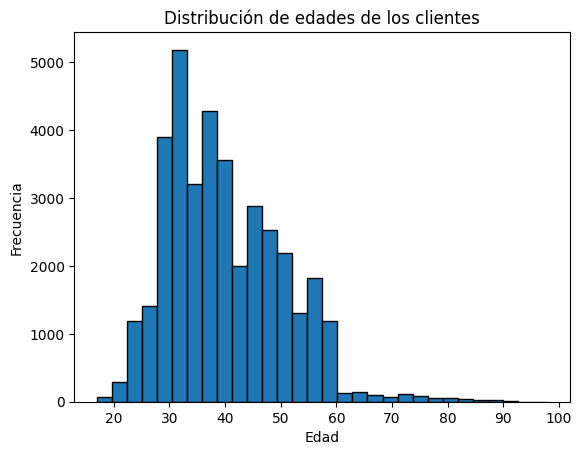

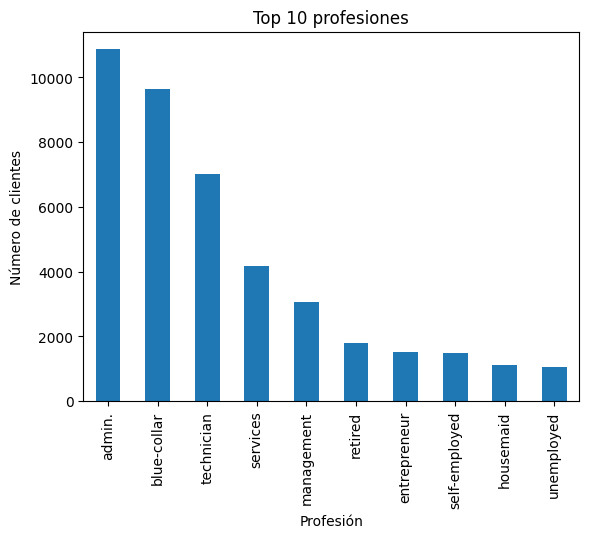

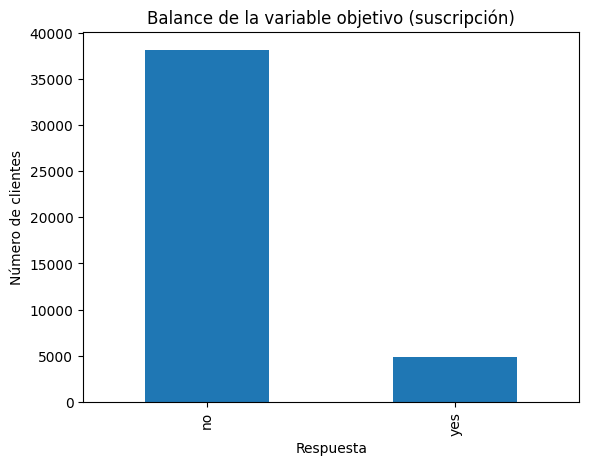

In [32]:
import matplotlib.pyplot as plt

# 1) Histograma de edades
df["age_num"] = pd.to_numeric(df["age"], errors="coerce")  # asegurar numérica
df["age_num"].dropna().plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribución de edades de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# 2) Barras de profesiones (top 10)
df["job"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 profesiones")
plt.xlabel("Profesión")
plt.ylabel("Número de clientes")
plt.show()

# 3) Balance de la variable objetivo (y)
df["y"].value_counts().plot(kind="bar")
plt.title("Balance de la variable objetivo (suscripción)")
plt.xlabel("Respuesta")
plt.ylabel("Número de clientes")
plt.show()

4. **Visualización**  
   Representación gráfica de las principales variables para identificar patrones y distribuciones de manera más clara.


## Visualización de los datos

En este apartado se representan gráficamente las principales variables del dataset, tanto numéricas como categóricas, para comprender mejor su distribución.

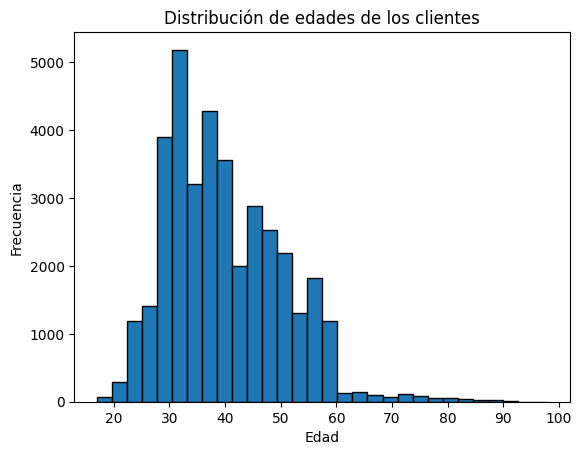

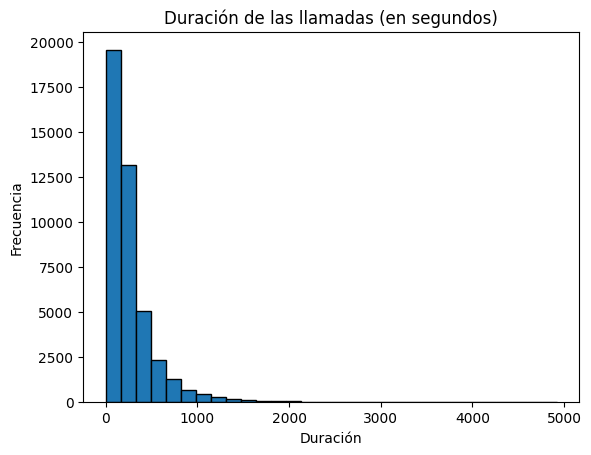

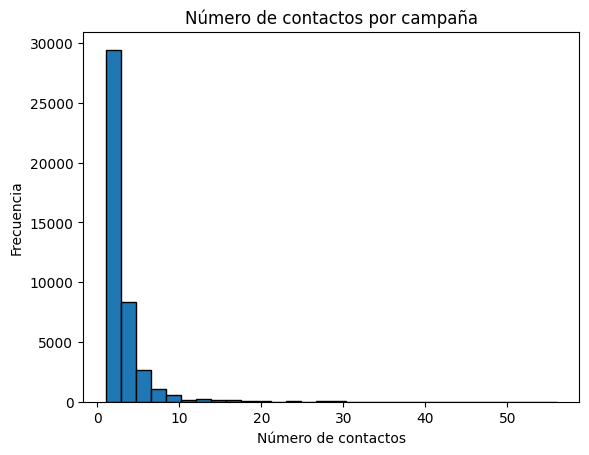

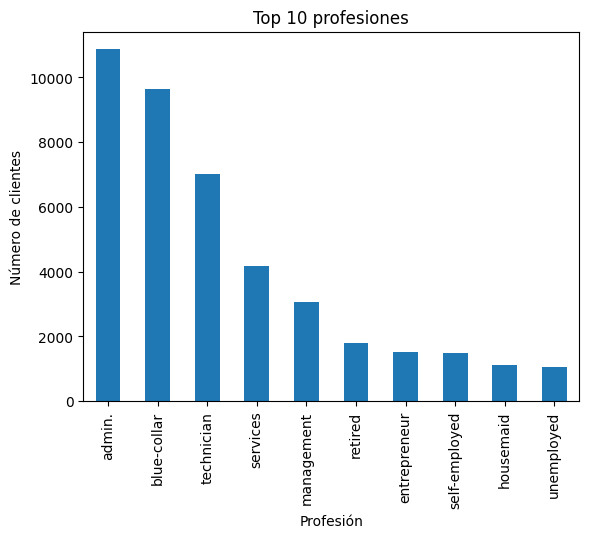

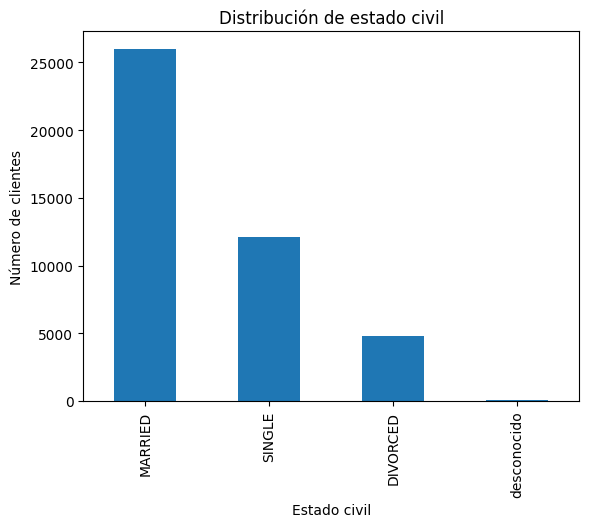

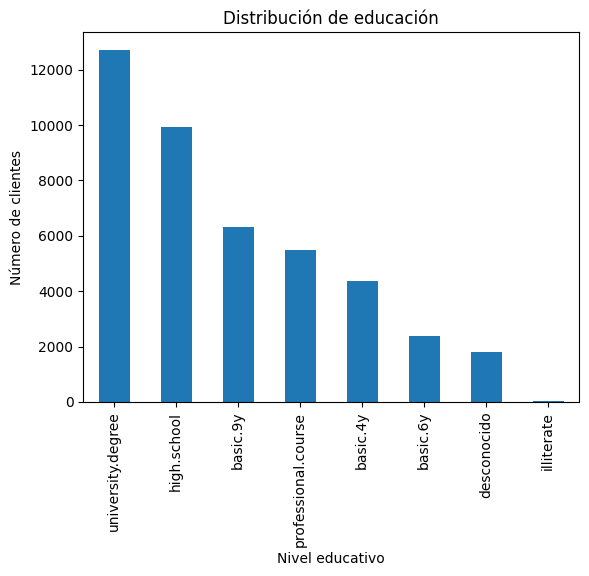

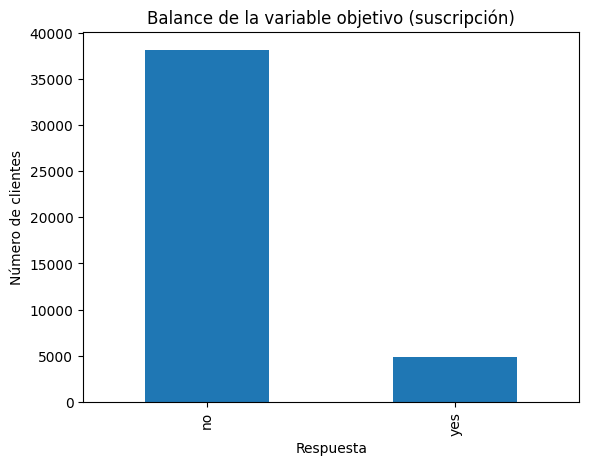

In [37]:
import matplotlib.pyplot as plt

# ======================
# 1. Variables numéricas
# ======================

# Histograma de edades
df["age_num"].dropna().plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribución de edades de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Histograma de duración de llamadas
df["duration"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Duración de las llamadas (en segundos)")
plt.xlabel("Duración")
plt.ylabel("Frecuencia")
plt.show()

# Histograma de campañas
df["campaign"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Número de contactos por campaña")
plt.xlabel("Número de contactos")
plt.ylabel("Frecuencia")
plt.show()


# ======================
# 2. Variables categóricas
# ======================

# Barras de profesiones (job) - top 10
df["job"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 profesiones")
plt.xlabel("Profesión")
plt.ylabel("Número de clientes")
plt.show()

# Barras de estado civil
df["marital"].value_counts().plot(kind="bar")
plt.title("Distribución de estado civil")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.show()

# Barras de educación
df["education"].value_counts().plot(kind="bar")
plt.title("Distribución de educación")
plt.xlabel("Nivel educativo")
plt.ylabel("Número de clientes")
plt.show()

# Balance de la variable objetivo (y)
df["y"].value_counts().plot(kind="bar")
plt.title("Balance de la variable objetivo (suscripción)")
plt.xlabel("Respuesta")
plt.ylabel("Número de clientes")
plt.show()

## Análisis Descriptivo

En esta sección se resumen las principales características del dataset:

- **Variables numéricas**: se analizan medidas de tendencia central (media, mediana), dispersión (desviación estándar), valores mínimos y máximos.
- **Variables categóricas**: se revisa la distribución de frecuencias para identificar las categorías más comunes.

In [35]:
# --- Análisis descriptivo de variables numéricas ---
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,43000.0,257.739279,258.666033,0.000,102.000,179.000,319.000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.000,2.000,3.000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.000,999.000,999.000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.000,0.000,0.000,7.000
cons.price.idx,43000.0,93.576134,0.576652,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,43000.0,3.883541,1.621095,0.634,1.466,4.857,4.959,5.045
nr.employed,43000.0,5166.852602,72.411125,4963.600,5099.100,5191.000,5228.100,5228.100
age_num,37880.0,39.977112,10.437957,17.000,32.000,38.000,47.000,98.000


In [36]:
# --- Análisis descriptivo de variables categóricas ---
print("Distribución de job:\n", df["job"].value_counts(), "\n")
print("Distribución de marital:\n", df["marital"].value_counts(), "\n")
print("Distribución de education:\n", df["education"].value_counts(), "\n")
print("Distribución de housing:\n", df["housing"].value_counts(), "\n")
print("Distribución de loan:\n", df["loan"].value_counts(), "\n")
print("Distribución de y (objetivo):\n", df["y"].value_counts(), "\n")

Distribución de job:
 job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
desconocido        345
Name: count, dtype: int64 

Distribución de marital:
 marital
MARRIED        25999
SINGLE         12105
DIVORCED        4811
desconocido       85
Name: count, dtype: int64 

Distribución de education:
 education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
desconocido             1807
illiterate                18
Name: count, dtype: int64 

Distribución de housing:
 housing
desconocido    43000
Name: count, dtype: int64 

Distribución de loan:
 loan
desconocido    43000
Name: count, dtype: int64 

Distribución de y (objetivo):
 y
no     38156
yes     4844
Name: c

## Conclusiones finales

El dataset trabajado contiene alrededor de 43.000 registros y 24 variables relacionadas con campañas de marketing bancarias. Antes del análisis se realizó un proceso de limpieza, eliminando valores que no correspondían a profesiones reales (UUIDs), convirtiendo la edad en una variable numérica (`age_num`) y reemplazando los valores faltantes por la categoría “desconocido”.

### Variables numéricas
- La mayoría de los clientes tiene entre 30 y 40 años.  
- La duración de las llamadas se concentra en valores bajos, generalmente por debajo de los 500 segundos, aunque existen casos aislados de llamadas muy largas que superan los 4.000 segundos.  
- En la variable `campaign`, la mayoría de clientes fue contactado entre 1 y 3 veces, con muy pocos casos en los que se superan los 50 contactos.

### Variables categóricas
- Las profesiones más frecuentes son *admin.*, *blue-collar* y *technician*.  
- El estado civil predominante es *married*, seguido de *single*.  
- El nivel educativo más común es el secundario, aunque también hay un número importante de clientes con estudios superiores.

### Variable objetivo (`y`)
- La variable `y` se encuentra desbalanceada: la gran mayoría de los clientes respondió “no” a la oferta, frente a un porcentaje mucho menor que sí aceptó.  
- Este desbalance es un aspecto a tener en cuenta en cualquier análisis posterior o modelo predictivo.

